In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [3]:
df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/cell_samples.csv")
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
df.shape

(699, 11)

In [5]:
df['Class'].value_counts()

Class
2    458
4    241
Name: count, dtype: int64

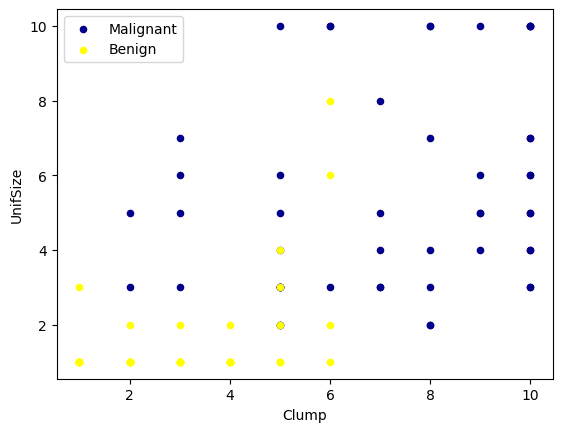

In [6]:
ax=df[df['Class']==4][0:50].plot(kind='scatter',x='Clump',y='UnifSize',color='Darkblue',label='Malignant');
df[df['Class']==2][0:50].plot(kind='scatter',x='Clump',y='UnifSize',color='Yellow',label='Benign',ax=ax);
plt.show()

In [7]:
df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [8]:
df=df[pd.to_numeric(df['BareNuc'],errors='coerce').notnull()]
df['BareNuc']=df['BareNuc'].astype('int')
df.dtypes

<ipython-input-8-18e0b8fc6dc2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BareNuc']=df['BareNuc'].astype('int')


ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [10]:
feature_df=df[['Clump',	'UnifSize',	'UnifShape'	,'MargAdh'	,'SingEpiSize'	,'BareNuc'	,'BlandChrom'	,'NormNucl'	,'Mit']]
X=np.asarray(feature_df)
X[0:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]])

In [11]:
y=np.asarray(df['Class'])
y[0:5]

array([2, 2, 2, 2, 2])

**Train and Test**

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=4)
print("Training shape:",X_train.shape,y_train.shape)
print("Testing shape:",X_test.shape,y_test.shape)

Training shape: (546, 9) (546,)
Testing shape: (137, 9) (137,)


**Modelling**

The SVM algorithm offers a choice of kernel functions for performing its processing. Basically, mapping data into a higher dimensional space is called kernelling. The mathematical function used for the transformation is known as the kernel function, and can be of different types, such as:

1.Linear
2.Polynomial
3.Radial basis function (RBF)
4.Sigmoid

In [13]:
from sklearn import svm
kernel=svm.SVC(kernel='rbf')
kernel.fit(X_train,y_train)

SVC()

In [14]:
y_pred=kernel.predict(X_test)
y_pred[0:5]

array([2, 4, 2, 4, 2])

**Evaluation**

In [18]:
from sklearn.metrics import jaccard_score,classification_report,f1_score,confusion_matrix
print("classification report is \n{}".format(classification_report(y_test,y_pred)))
print("\nf1-score is {}".format(f1_score(y_test,y_pred,average='weighted')))
print("\njaccard score is {}".format(jaccard_score(y_test,y_pred,pos_label=2)))

classification report is 
              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137


f1-score is 0.9639038982104676

jaccard score is 0.9444444444444444


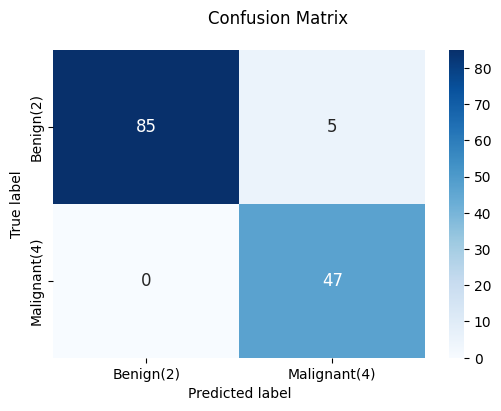

In [23]:
cm = confusion_matrix(y_test, y_pred,labels=[2,4])

# Define classes
classes = ['Benign(2)','Malignant(4)']

# Set up figure
plt.figure(figsize=(6, 4))
plt.suptitle("Confusion Matrix", fontsize=12)
import seaborn as sns
# Create heatmap using Seaborn
sns.heatmap(cm, annot=True, cmap="Blues", fmt='d', cbar=True, annot_kws={"size": 12})

# Set axis labels and tick marks
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.xticks(np.arange(len(classes)) + 0.5, classes)
plt.yticks(np.arange(len(classes)) + 0.5, classes)
plt.show()